# Simulation of a positron-induced Muon Source (part 1)

### Description

The production of a high brillance muon beam is one of the most important challenge for the future of Particle Physics. A particularly interesting idea consists of shooting high energy positrons on a target, aiming at the production of muons by means of the process $e^+ + e^- \rightarrow \mu^+ + \mu^-$. To mimize the divergence of the resulting "muon beam", the positrons energy is chosen so that the reaction occurs close to threshold (assuming the electrons in the target to be at rest). The main goal of this project is to produce a Monte Carlo simulation of such a process. 



### References

* [LEMMA](https://arxiv.org/pdf/1509.04454.pdf) paper. The original paper describing the positron-induced low emittance muon source, ehere all the relevant kinematic features of the process have been studied
* [Babayaga](https://www2.pv.infn.it/~hepcomplex/babayaga.html) event generator. You may want to install and run it as a comparison for your results.
* [2018 Experiment](https://arxiv.org/pdf/1909.13716.pdf): the paper describing the (very poor..) results of the experiment carried out in summer 2018
* [2021 proposal](https://cds.cern.ch/record/2712394?ln=en): the proposal for the experiment in 2021


### Contact

* Marco Zanetti <marco.zanetti@unipd.it>
* Camilla Curatolo <camilla.curatolo@pd.infn.it>
* Nicola Amapane <nicola.amapane@unito.it>


3. boost muons four-momenta in the laboratory frame, i.e. in the frame where the electron is at rest and the positron has enough energy to give rise to the process;


<div>
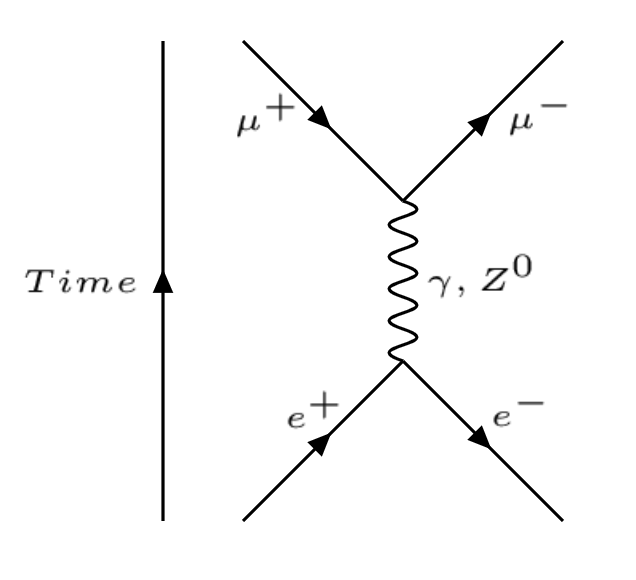
</div>

Muon pair production will only occur if the center of mass energy has enough energy to account for two muons i.e it meets the condition that $\sqrt{s} \geq 2m_\mu $. 

 ### Center of mass frame

The center of mass frame is defined such that the sum of the momentum must be zero. To make this happen we need invent a frame which moves at $-v_{e^+}/2$ For a two particle system like our positron electron pair we have that their momentum's must be opposite. 


$$\vec{p}_{e^+}=-\vec{p}_{e^-}$$


$$p_{e^+}=\left(E_{e^+}, \vec{p}_{e^+}\right), \quad p_{e^-}=\left(E_{e^-}, \vec{p}_{e^-}\right), \quad $$
When we add these momentum in the matrix addition$s$ the opposite momentum cancel
$$s=\left(p_{e^+}+p_{e^-}\right)^{2}=\left(E_{e^+}+E_{e^-}, 0\right)^{2}=4 E^{2}$$


$$E=E_{e^+}=E_{e^-} \therefore \sqrt{s}=2 E$$

The energy available to the muon pair must be half of the center of mass energy. Note for convenicence we $m_\mu$ wrote here is the muon rest mass  

$$E_\mu= \frac{s}{2} =\sqrt{p_\mu^{2} +m_{\mu}^{2}} \therefore |p_\mu| =\sqrt{\frac{s}{4} -m_\mu} $$ 




 ### Lab frame


Lab frame: is the frame in which one of the particles is at rest in out case the electron in the beryllium target.

$$p_{e^+}=\left(\begin{array}{c}
E  \\
p_{x} \\
0 \\
0
\end{array}\right), \phantom{fillll}   p_{e^-}=\left(\begin{array}{c}
m_{e}
\\
0 \\
0 \\
0
\end{array}\right)$$

$$
p_{e^+} + p_{e^-}=\left(\begin{array}{c}
E+m_{e} \\
p_x \\
0 \\
0
\end{array}\right)$$

$$
s=(p_{e^+} + p_{e^-})^2= E^2 +2m_{e}E+ m_e^2 - p_x^2 $$

Remebering that  
 $$E^2 = p^2+m^2 \therefore p^2 = E^2-m^2$$
 Gives  
 $$s=2m_eE+2m_e^2 \approx 2m_eE$$

### Transforming between frames

Muon pair production will only occur if the center of mass energy has enough energy to account for two muons i.e it meets the condition that $\sqrt{s} \geq 2m_\mu $. We can write the momentum in the CoM frame as 

not finished....

paper used for boosts 
https://web.physics.utah.edu/~jui/5110/hw/kin_rel.pdf


In [64]:
import numpy as np

#Natural Units Used for simplicity

m_mu = 105.6583755 #MeV
m_e = 0.510998 #MeV
E_additional = 5 #MeV 

root_s =  2*m_mu + E_additional 
s = root_s**2

#Magnitudes from collision analysis can just use from s and mass of the particle
def p_com(s, m):
    return np.sqrt((s-(2*m)**2)/4)

def p_lab(s, m):
    return (1/(2*m_e))*np.sqrt(s*(s-(2*m)**2))

def E_lab(s,m): #E 
    return (s - 2*m**2)/(2*m)  

def E_com(s,m):
    E_l=E_lab(s,m)
    return (m**2+m*E_l)/np.sqrt(s)  

#
def gamma_f_E(E_l, m,s):# gamma from energy, E_l is E_lab in function 
    return (E_l+m)/np.sqrt(s)

def beta_f_gamma(gamma):
    return 1 - 1/(gamma**2)

def boost_p(gamma, frame_v, E, p):#1D momentum boost
    return gamma*(p-E*frame_v) 

def inv_boost_p(gamma, frame_v, E, p):#1D momentum boost
    return gamma*(p+E*frame_v)

def boost_E(gamma, frame_v, E, p):#1D momentum boost
    return gamma*(E - frame_v*p) 

def inv_boost_E(gamma, frame_v, E, p):#This one is for everything from the other frame
    return gamma*(E+ frame_v*p)

def v_frame_com(p, E, m):
    return p/(E +m)

def angle_boost(angle, beta):#in radians 
    return np.arctan(np.sin(angle)/(beta +np.cos(theta)))


p_com_e = p_com(s,m_e)
p_com_mu = p_com(s,m_mu)
E_com_e = E_com(s,m_e)
E_com_mu = E_com(s,m_mu)

p_lab_e = p_lab(s,m_e)
p_lab_mu = p_lab(s,m_mu)
E_lab_e = E_lab(s,m_e) #positron beam energy
#E_lab_mu = E_lab(s,m_mu)

print('Com ------------------')
print('p_e =', p_com_e)
print('p_mu =', p_com_mu)
print('E_e =',E_com_e)
print('E_mu =', E_com_mu)

print('Lab ------------------')
print('p_e =', p_lab_e)
print('p_mu =', p_lab_mu)
print('E =', E_lab_e)

test = p_lab_e*m_e/root_s #expected result that p*=p_lab* m_2/(sqrt2) verified

print('Boosts ------------------')
c_com = v_frame_com(p_lab_e, E_lab_e, m_e)
print('v com frame = ',v_com)
gamma = gamma_f_E(E_lab_e, m_e, s)
print('gamma = ', gamma)

print('positron boost to com')
print('p_lab_e', p_lab_e)

p_boost = boost_p(gamma, v_com, E_lab_e, p_lab_e)
print('p_boost  = ', p_boost)

E_boost = boost_E(gamma, v_com, E_lab_e, p_lab_e)

print('E_boost = ', E_boost)
print('boost back to lab')
p_back = inv_boost_p(gamma, v_com, E_com_e, p_com_e) #Test to see if we can get back to start
E_back = inv_boost_E(gamma, v_com, E_com_e, p_com_e)
print('p_lab_back', p_back)
print('E_lab_back', E_back)

Com ------------------
p_e = 108.15716837936816
p_mu = 23.120161710074605
E_e = 108.1583755
E_mu = 108.1583755
Lab ------------------
p_e = 45785.320610227165
p_mu = 9787.275613051212
E = 45785.32061307872
Boosts ------------------
v com frame =  0.999988839323573
gamma =  211.66105444639706
positron boost to com
p_lab_e 45785.320610227165
p_boost  =  108.15716837862861
E_boost =  108.158375499561
boost back to lab
p_lab_back 45785.32061022716
E_lab_back 45785.320613078715


$$
p_{com}=\left(\begin{array}{c}
E / c \\
p_{x} \\
p_{y} \\
p_{z}
\end{array}\right)=\left(\begin{array}{c}
\sqrt{S} / 2 \\
p_{\mu} \sin \theta^{*} \sin \phi^{*} \\
p_{\mu} \sin \theta^{*} \cos \phi^{*} \\
p_{\mu} \cos \theta^{*}
\end{array}\right)
$$

$$p_{e^+}=\left(\begin{array}{c}
E  \\
p_{x} \\
0 \\
0
\end{array}\right), \phantom{fillll}   p_{e^-}=\left(\begin{array}{c}
m_{_0} \\
0 \\
0 \\
0
\end{array}\right)$$
$$
p_{e^+} + p_{e^-}=\left(\begin{array}{c}
m_{_0} / c \\
0 \\
0 \\
0
\end{array}\right)$$

 $$s = \left(p_{e^+} + p_{e^-}\right)^2 = $$

The produced muon coordinates are derived from the center of mass frame and then boosted to the labratory.

$$p_{e^+}=\left(\begin{array}{c}
E  \\
p_{x} \\
0 \\
0
\end{array}\right), \phantom{fillll}   p_{e^-}=\left(\begin{array}{c}
m_{_0} \\
0 \\
0 \\
0
\end{array}\right)$$
$$
p_{e^+} + p_{e^-}=\left(\begin{array}{c}
E+m_{_0}  \\
p_{x} \\
0 \\
0
\end{array}\right)$$

 $$s = \left(p_{e^+} + p_{e^-}\right)^2 = E^2 +2mE +m_{_0}^2 -p_x^2  $$
 Remebering that  
 $$E = p^2+m \therefore p^2 = E-m$$
 Gives  
 $$s=2mE$$

Threshold energy for muon production $E_{\mu \, threshold}$ = 43.7 GeV
Muon four momentum  in the center of mass 
$$
p^{*}=\left(\begin{array}{c}
E / c \\
p_{x} \\
p_{y} \\
p_{z}
\end{array}\right)=\left(\begin{array}{c}
\sqrt{S} / 2 \\
p_{\mu} \sin \theta^{*} \sin \phi^{*} \\
p_{\mu} \sin \theta^{*} \cos \phi^{*} \\
p_{\mu} \cos \theta^{*}
\end{array}\right)
$$

where $p_{\mu}=\sqrt{S / 4-m_{\mu}^{2}}$. This four-momentum is then boosted to the laboratory frame $\left(p_{\text {boost }}=\left(E-m_{e}, 0,0, \sqrt{E^{2}-m_{e}^{2}}\right)\right)$, so to obtain the angles $\theta$ and $\phi$ in the laboratory frame. These values are then used to calculate the transverse momentum of the muon in the laboratory frame according to:
$$
\begin{aligned}
&p_{x}^{\mu} / p^{\mu}=p_{x}^{c+} / p^{s+}+\sin \theta \sin \phi \\
&p_{y}^{\mu} / p^{\mu}=p_{y}^{\varepsilon+} / p^{c+}+\sin \theta \cos \phi
\end{aligned}
$$

https://documentcloud.adobe.com/gsuiteintegration/index.html?state=%7B%22ids%22%3A%5B%221TUnHAXwzzgZ7JGne7nxMWJEnyQ3zEgJE%22%5D%2C%22action%22%3A%22open%22%2C%22userId%22%3A%22113748869220801030575%22%2C%22resourceKeys%22%3A%7B%7D%7D

5. produce a synthetic dataset of about $N=10^5$ (or more) events. Events should be listed as rows in a file with columns representing the muons coordinates (keep in mind that in the lab frame muons are relativistic and thus the number of coordinates can be only 3 per muon);

In [ ]:
import pandas 

N = 


No time compoent in lab frame